In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap


from utils.gravity_models import GravityModel
from utils.gravity_models import add_new_gravity_model
import utils.points as sphere
from utils.gravity_models import geodetic_coord
import forces

In [3]:
add_new_gravity_model(name="JGM3", 
                      body="earth", 
                      ref_GM=398600.4415, 
                      ref_radius=6378.1363,
                      degree=70, 
                      file="coefficients/JGM3.gfc", 
                      normalize=True)

In [4]:
radius = 6378.1363 + 0.001

delta_phi = np.deg2rad(1)  
delta_theta = np.deg2rad(1)
pos = sphere.uniform(radius, delta_phi, delta_theta)

geo = geodetic_coord(pos)
lon = np.rad2deg(geo[:,0])
lat = np.rad2deg(geo[:,1])
alt = geo[:,2]

## Model

In [5]:
model_1 = GravityModel("JGM3")
model_2 = GravityModel("JGM3")
model_2.set_max(2, 0)

## Potential

In [6]:
pot_1 = forces.harmonic_potential(pos, model_1)*1000
pot_2 = forces.harmonic_potential(pos, model_2)*1000
pot_dif = pot_2 - pot_2

## Acceleration

In [7]:
acc_1 = (norm(forces.harmonic_accleration(pos, model_1), axis=1)*1000)
acc_2 = (norm(forces.harmonic_accleration(pos, model_2), axis=1)*1000)
acc_dif = acc_1 - acc_2

## Spherical Plot

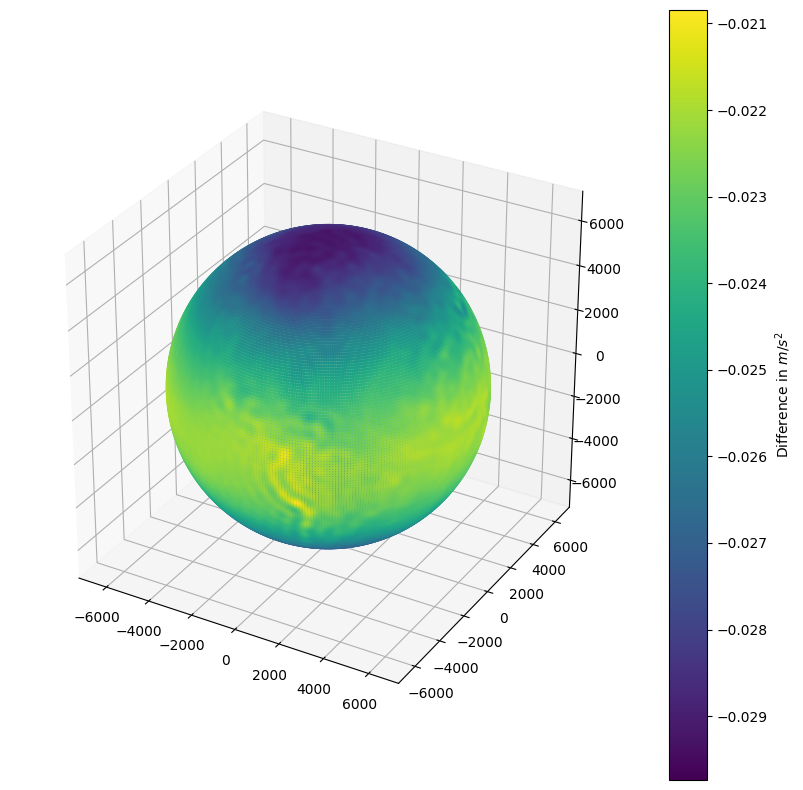

In [8]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
ax.set_aspect("equal")
colmap = plt.cm.viridis
normalize = mpl.colors.Normalize(vmin=np.min(acc_dif), vmax=np.max(acc_dif))
sphere = ax.scatter(pos[:, 0], pos[:, 1], pos[:, 2], c=acc_dif, s=2, cmap=colmap, norm=normalize)
cbar = fig.colorbar(sphere, ax=ax)
cbar.ax.set_ylabel('Difference in $m/s^2$')
plt.show()